In [1]:
from matplotlib import pyplot as plt
from lira_funcs import *

In [2]:
def twos_complement_binary_to_float(binary_num, integer_bits, decimal_bits):
    def binary_addition(bin_num):
        carry = 1
        result = ""
        for bit in reversed(bin_num):
            if bit == "0" and carry == 0:
                result = "0" + result
                carry = 0
            elif bit == "0" and carry == 1:
                result = "1" + result
                carry = 0
            elif bit == "1" and carry == 0:
                result = "1" + result
                carry = 0
            elif bit == "1" and carry == 1:
                result = "0" + result
                carry = 1
        if carry == 1:
            result = "1" + result
        return result
    
    float_number = 0.0
    pos = 1
    negative = False
    
    if binary_num[0] == '1':
        negative = True
        new_binary_num = ''.join('1' if bit == '0' else '0' for bit in binary_num)
        new_binary_num = binary_addition(new_binary_num)
        #print(new_binary_num)
    else:
        new_binary_num = binary_num
    
    for bit in range(integer_bits + decimal_bits):
        if 0 <= bit < integer_bits:
            if new_binary_num[bit] == '1':
                if negative:
                    float_number -= 2 ** (integer_bits - bit - 1)
                else:
                    float_number += 2 ** (integer_bits - bit - 1)
        else:
            if new_binary_num[bit] == '1':
                if negative: 
                    float_number -= (2 ** -pos)
                else:
                    float_number += (2 ** -pos)
            pos += 1
    return float_number

In [9]:
file_path = "output_file_int.txt"
input_file = "output_file.txt"

integer_bits = 35
decimal_bits = 0

with open(input_file, 'r') as f1:
    with open(file_path, 'w') as f2:
        for line in f1: 
            int_num = twos_complement_binary_to_float(line.rstrip(), integer_bits, decimal_bits)
            print(line)
            print(int_num)
            f2.write(str(int_num) + '\n')

11111111111111111111111111111111010

-6.0
11111111111111111111111111111111110

-2.0
00000000000000000000000000000001110

14.0
00000000000000000000000000000011111

31.0
00000000000000000000000000000100011

35.0
00000000000000000000000000000001011

11.0
11111111111111111111111111111100001

-31.0
11111111111111111111111111111000001

-63.0
11111111111111111111111111111001000

-56.0
11111111111111111111111111111110011

-13.0
00000000000000000000000000000101101

45.0
00000000000000000000000000001010000

80.0
00000000000000000000000000001000000

64.0
00000000000000000000000000000001000

8.0
11111111111111111111111111111001011

-53.0
11111111111111111111111111110110001

-79.0
11111111111111111111111111111001000

-56.0
11111111111111111111111111111111111

-1.0
00000000000000000000000000000101111

47.0
00000000000000000000000000000110111

55.0
00000000000000000000000000000011100

28.0
11111111111111111111111111111111101

-3.0
11111111111111111111111111111110111

-9.0
0000000000000000000000000000

11111111111111111101110101101101010

-70806.0
11111111111111110011110000100010011

-401133.0
11111111111111110001000101111000111

-488505.0
11111111111111110111110110001000101

-267195.0
00000000000000000100000100100100110

133414.0
00000000000000001110001010011100111

464103.0
00000000000000001111100101110111011

510907.0
00000000000000000111001000000111000

233528.0
11111111111111111001110100011010110

-202538.0
11111111111111101111111111011011110

-524578.0
11111111111111110000000001111000010

-523326.0
11111111111111111010001111001100001

-188831.0
00000000000000001000011100001100100

276580.0
00000000000000010001101110000001100

580620.0
00000000000000010000000000110101011

524715.0
00000000000000000100000100111001011

133579.0
11111111111111110101001100111001111

-353841.0
11111111111111101100110000110111001

-630343.0
11111111111111110000010011100111001

-514247.0
11111111111111111101111010000011001

-68583.0
00000000000000001101001100011111100

432380.0
000000000000000101001000

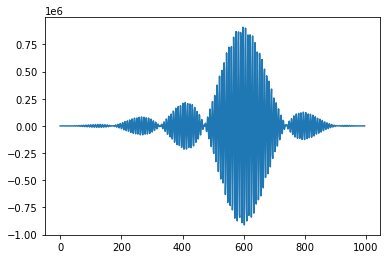

In [10]:
output_signal = np.loadtxt('output_file_int.txt')
plt.plot(output_signal)

In [11]:
correlation = np.loadtxt('xcorr_py_2.txt')

In [34]:
max(output_signal)

266625656.0

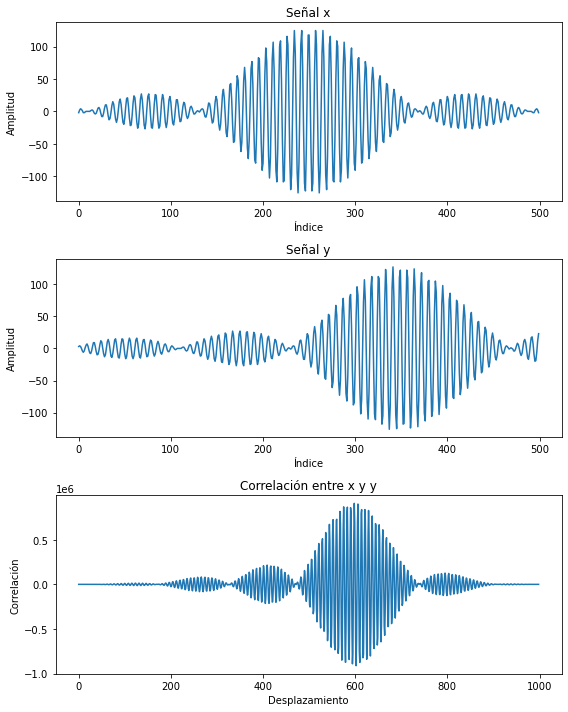

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Calcular la correlación
correlation = np.correlate(I_pd_Tsensor, I_pd_Tref, mode='full')

# Crear una figura y un conjunto de subfiguras
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Subfigura 1: Señal x
axes[0].plot(I_pd_Tref)
axes[0].set_xlabel('Índice')
axes[0].set_ylabel('Amplitud')
axes[0].set_title('Señal x')

# Subfigura 2: Señal y
axes[1].plot(I_pd_Tsensor)
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('Amplitud')
axes[1].set_title('Señal y')

# Subfigura 3: Correlación
indices = np.arange(len(correlation)) #- len(y) + 1
axes[2].plot(indices, correlation)
axes[2].set_xlabel('Desplazamiento')
axes[2].set_ylabel('Correlación')
axes[2].set_title('Correlación entre x y y')

# Ajustar los espacios entre subfiguras y mostrar la figura
plt.tight_layout()
plt.show()

In [10]:
len(correlation)

999

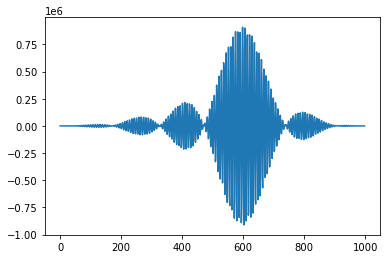

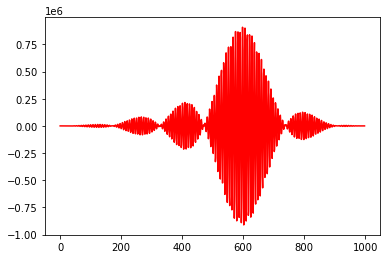

In [12]:
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

ax1.plot(correlation)
ax2.plot(signal_inv, 'r')

598
907874.0
598
907874.0


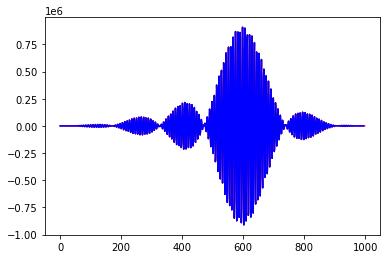

In [12]:
plt.plot(correlation, 'r')
plt.plot(output_signal, 'b')

print(np.argmax(correlation))
print(max(correlation))
print(np.argmax(output_signal))
print(max(output_signal))

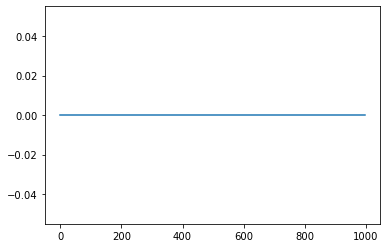

In [13]:
rest = output_signal - correlation[0:996]
plt.plot(rest)

In [16]:
for i in range (len(rest)):
    if (rest[i] > 0 or rest[i]<0):
        print(i)

141
142
143
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
253
254
255
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401


In [32]:
file = "xcorr_py_2.txt"
with open(file, "w") as f:
    for i in range(len(correlation)):
        f.write(str(int(correlation[i])))
        f.write("\n")

In [2]:
# Sampling related parameters
### Depending on the shape, it may work with lower ADC frequencies
f_s_adc = 5e5 #10e6
f_mod = 1e3
n_reps = 1

t_s_mod = 1 / f_mod
n_points = f_s_adc // f_mod

print("N_points:\t", n_points)

### For using the full integral numerical result
#I_pd_func = I_pd_integral_trapz_func

### For using the integral of the band of interest
# I_pd_func =  I_pd_integral_bw_func

### For using the analytical short equation of the band of interest
I_pd_func = I_pd_analytical_func

# Method = 'same-norm' (normalitzation) good to reach edges; 'same-weighted' (only weighting factor by number of
# elements) not so good bu better than only same; 'same' (nor weighting nor normalized) has reduced range.
#method = "same-weighted"
method = "same"

# Optical design parameters
L_2 = 1e-3
L_1 = 2*L_2
delta_L_2_sensor = 0
# Baseline for 50K is 86mm
L_3 = 86e-3
# To add 20K margin (10k on each side) to reach 50K (theoretical: e_V*beta/(dT*f_mod*alpha_T))
###L_3 = 57e-3
lambda_1 = 1.5e-6
lambda_2 = 1.6e-6
# Aluminium CTE
alpha_T = 23.1e-6
# Temperature of the sensor with respect to the centered reference
T_sensor = 10
T_ref = 0
delta_T = T_sensor - T_ref
# PK4GA7P1
e_V = 100e-6 / 150
beta = 150 * f_mod

# Maximum power on the photodiode [W]
P_pd_max = 1e-6

# Photodiode responsivity [A/W]
res_pd = 1

# TIA gain [V/A]
tia_gain = 200e3

# FDA gain
fda_gain = 15
# ADC FSR [V]
adc_fsv = 2
# ADC #bits
adc_bits = 8

# in dB, set to None to disable
SNR_dB = 70

N_points:	 500.0


Sensitivity:			 39.731999999999985  us/K
Carrier frequency:		 64.60097491666669  kHz
Sinc frequency:			 2.083902416666665  kHz
Relative phase between signals:	 149.03569947419967  degrees
Time delay between signals:	 198.65999999999994  us
Vpp:			 150.0  V
[-2.  2.  4.  3.  1. -2. -2. -1. -0.  0.]
[ 3.  4.  3. -0. -4. -6. -4.  1.  5.  7.]


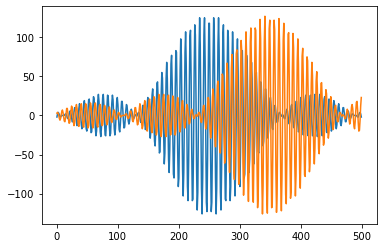

In [3]:
sensitivity_value = sensitivity(L_3=L_3, e_V=e_V, beta=beta)
print("Sensitivity:\t\t\t", sensitivity_value * 1e6, ' us/K')

analytic_carrier_freq = get_carrier_freq(lambda_1=lambda_1, lambda_2=lambda_2, e_V=e_V, beta=beta)
print("Carrier frequency:\t\t", analytic_carrier_freq * 1e-3, ' kHz')

analytic_sync_freq = get_sync_freq(lambda_1=lambda_1, lambda_2=lambda_2, e_V=e_V, beta=beta)
print("Sinc frequency:\t\t\t", analytic_sync_freq * 1e-3, ' kHz')

analytic_rel_phase = get_relative_T0_phase(L_3=L_3, alpha_T=alpha_T, delta_T=delta_T,
                                           lambda_1=lambda_1, lambda_2=lambda_2, )
print("Relative phase between signals:\t", analytic_rel_phase * 180 / np.pi, ' degrees')

analytical_delay = old_temp_to_delay(analytic_sync_freq, delta_T=delta_T, L_3=L_3,
                                 alpha_T=alpha_T, lambda_1=lambda_1, lambda_2=lambda_2)
print("Time delay between signals:\t", analytical_delay * 1e6, ' us')

V_mod, t_vec = V_mod_ramp_func(beta=beta, n_points=n_points, t_start=-t_s_mod / 2, t_end=t_s_mod / 2)
if n_reps > 1:
    V_mod = np.tile(V_mod, n_reps)
    t_vec = np.linspace(-n_reps * t_s_mod / 2, n_reps * t_s_mod / 2, int(n_reps * n_points))

plt.plot(t_vec, V_mod)
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")
plt.savefig("piezo_driver_ramp.png")
plt.close()
print("Vpp:\t\t\t", V_mod.max() - V_mod.min(), " V")

I_pd_Tref = I_pd_func(V_mod, L_1=L_1, L_2=L_2, L_3=L_3, lambda_1=lambda_1, lambda_2=lambda_2, e_V=e_V,
                      alpha_T=alpha_T, delta_T=T_ref, P_opt=P_pd_max)
I_pd_Tsensor = I_pd_func(V_mod, L_1=L_1, L_2=L_2 + delta_L_2_sensor, L_3=L_3, lambda_1=lambda_1, lambda_2=lambda_2, e_V=e_V,
                         alpha_T=alpha_T, delta_T=T_sensor, P_opt=P_pd_max)

if SNR_dB is not None:
    signal_std = I_pd_Tref.std()
    noise_std = signal_std / (10 ** (SNR_dB / 20))
    I_pd_Tref += np.random.normal(loc=0, scale=noise_std, size=I_pd_Tref.size)

    signal_std = I_pd_Tsensor.std()
    noise_std = signal_std / (10 ** (SNR_dB / 20))
    I_pd_Tsensor += np.random.normal(loc=0, scale=noise_std, size=I_pd_Tsensor.size)

ylabel = "Photodiode current $[\mu A]$"
scale = 1e6

if res_pd is not None:
    I_pd_Tref *= res_pd
    I_pd_Tsensor *= res_pd

    if tia_gain is not None:
        I_pd_Tref *= tia_gain
        I_pd_Tsensor *= tia_gain
        ylabel = "TIA output voltage $[V]$"
        scale = 1

    if adc_bits is not None:
        # DC blocking
        I_pd_Tref -= I_pd_Tref.mean()
        I_pd_Tsensor -= I_pd_Tsensor.mean()
        # FDA (or second stage) gain
        I_pd_Tref *= fda_gain
        I_pd_Tsensor *= fda_gain
        # Quantization
        lsb = adc_fsv/((2**adc_bits) - 1)
        I_pd_Tref = np.round(I_pd_Tref/lsb)
        I_pd_Tsensor = np.round(I_pd_Tsensor / lsb)
        ylabel = "ADC output [counts]"
        scale = 1

print(I_pd_Tref[0:10])
print(I_pd_Tsensor[0:10])
plt.figure()
plt.plot(I_pd_Tref)
plt.plot(I_pd_Tsensor)

In [66]:
print(I_pd_Tref[0])
print(I_pd_Tsensor[499])

-103.0
1465.0


In [25]:
max(I_pd_Tref)

8059.0

In [4]:
file = "input_file_1.txt"
with open(file, "w") as f:
    for i in range(int(n_points)):
        f.write(str(int(I_pd_Tsensor[i])))
        f.write("\n")
        
file = "input_file_2.txt"
with open(file, "w") as f:
    for i in range(int(n_points)):
        f.write(str(int(I_pd_Tref[i])))
        f.write("\n")

In [5]:
def to_signed_fixed_point(num, integer_bits, decimal_bits):
    if num < 0:
        sign = 1
        num *= -1
    else:
        sign = 0
    integer_part = int(num)
    decimal_part = num - integer_part
    binary_integer_part = format(integer_part, f'0{integer_bits}b')
    binary_decimal_part = ''
    while decimal_part > 0 and len(binary_decimal_part) < decimal_bits:
        decimal_part *= 2
        if decimal_part >= 1:
            binary_decimal_part += '1'
            decimal_part -= 1
        else:
            binary_decimal_part += '0'
    binary_number = binary_integer_part + binary_decimal_part
    if sign == 1:
        inverted_binary_number = ''
        for bit in binary_number:
            if bit == '1':
                inverted_binary_number += '0'
            elif bit == '0':
                inverted_binary_number += '1'
        binary_number = inverted_binary_number
        binary_number = binary_number[::-1]
        carry = 1
        inverted_twos_complement_binary = ''
        for bit in binary_number:
            if bit == '1' and carry == 1:
                inverted_twos_complement_binary += '0'
            elif bit == '0' and carry == 1:
                inverted_twos_complement_binary += '1'
                carry = 0
            else:
                inverted_twos_complement_binary += bit
        twos_complement_binary = inverted_twos_complement_binary[::-1]
        return twos_complement_binary
    else:
        return binary_number

In [6]:
file = "input_file.txt"
with open(file, "w") as f:
    for i in range(len(I_pd_Tsensor)):
        f.write(str(to_signed_fixed_point(I_pd_Tsensor[i], 8, 0)))
        #for j in range (3, -1, 1):
            #f.write(str(to_signed_fixed_point(noisy_signal[i], 2, 30)[j*8:8*(j+1)]))
        f.write("\n")
    for i in range(len(I_pd_Tref)):
        f.write(str(to_signed_fixed_point(I_pd_Tref[i], 8, 0)))
        #for j in range (3, -1, 1):
            #f.write(str(to_signed_fixed_point(noisy_signal[i], 2, 30)[j*8:8*(j+1)]))
        f.write("\n")

In [14]:
#corr, int_disp = find_integer_displacement(I_pd_Tref - I_pd_Tref.mean(), I_pd_Tsensor - I_pd_Tsensor.mean(),
                                           #method=method)
corr, int_disp = find_integer_displacement(I_pd_Tref, I_pd_Tsensor,
                                           method=method)
#print(int_disp)
plt.figure()
plt.plot(corr, "-b", label="python")
plt.figure()
plt.plot(output_signal, "-r", label="vhdl")

#plt.plot(corr, "-b", label="python")
#plt.plot(xcorr, "-r", label="vhdl")
#plt.legend(loc="upper left")
#plt.show()



In [36]:
max(corr)

3750418434.0

In [17]:
file = "xcorr_py.txt"
with open(file, "w") as f:
    for i in range(len(corr)):
        f.write(str(int(corr[i])))
        f.write("\n")

In [16]:
import matplotlib.pyplot as plt

# Crear la primera línea
plt.plot(corr, "-b", label="Gráfica 1")

# Crear la segunda línea encima de la primera
plt.plot(output_signal, "-r", label="Gráfica 2")

# Mostrar el gráfico con ambas líneas superpuestas
plt.legend()  # Mostrar las etiquetas de las líneas
plt.show()